In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import yaml

In [2]:
exec(open('/home/msackel/Desktop/gammaClassification/programm/theta_cut/theta_cut.py').read()) 
exec(open('/home/msackel/Desktop/gammaClassification/programm/model_significance/model_significance.py').read()) 
 
with open('/home/msackel/Desktop/gammaClassification/config/feature.yaml') as f: 
        feature = yaml.load(f) 

In [3]:
train_data = theta_cut('/home/msackel/Desktop/gammaClassification/data/raw_data/gamma_precuts.hdf5',  
                '/home/msackel/Desktop/gammaClassification/data/raw_data/mrk501_2014_precuts.hdf5', 0.01,100000)  

In [4]:
xgbc = XGBClassifier(
    max_depth= 1,
    booster= 'gbtree',
    n_jobs= 35,
    eval_metric= 'auc',
    min_child_weight= 10,
    gamma= 0.01,
    subsample= 0.2,
    learning_rate= 0.72,
)

parametergrid = {
    'reg_lambda': [1,0.1, 0.01],
}

In [5]:
clf = GridSearchCV(
        xgbc,
        param_grid= parametergrid,
        scoring='roc_auc',
        cv=2
        )

In [6]:
clf.fit(train_data.drop('label', axis=1), train_data.label)

GridSearchCV(cv=2, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=0.01,
       learning_rate=0.72, max_delta_step=0, max_depth=1,
       min_child_weight=10, missing=None, n_estimators=100, n_jobs=35,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.2),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'reg_lambda': [1, 0.1, 0.01]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [7]:
'''
Save the scorrings of the different parameters.
'''
best_esti = pd.DataFrame(clf.cv_results_)
best_esti.to_pickle('bestEsti')

In [8]:
best_esti = pd.read_pickle('bestEsti')
a = np.argsort(best_esti['mean_test_score'].values)
best_esti.loc[a[-1]]['params']

{'reg_lambda': 0.1}

In [9]:
best_esti.loc[a[::-1]]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_reg_lambda,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,0.614860,0.060172,0.837889,0.840026,0.1,{'reg_lambda': 0.1},1,0.836301,0.841666,0.839478,0.838386,0.003377,0.000373,0.001588,0.001640
2,0.613948,0.060856,0.837889,0.840027,0.01,{'reg_lambda': 0.01},2,0.836300,0.841666,0.839477,0.838387,0.002745,0.000063,0.001588,0.001639
0,0.662939,0.072659,0.837862,0.839820,1,{'reg_lambda': 1},3,0.836028,0.841560,0.839695,0.838080,0.048023,0.010274,0.001833,0.001740


In [10]:
xgbc = XGBClassifier(
    max_depth= 1,
    learning_rate= 0.5,
    n_estimators= 100,
    booster= 'gbtree',
    gamma= 0.5,
    n_jobs= 15,
    reg_lambda= 0.1,
    subsample= 0.20,
    eval_metric= 'auc'
)

In [13]:
score = cross_val_score(xgbc, train_data.drop('label', axis=1), train_data.label, cv= 5, scoring='roc_auc')

In [14]:
score.mean()

0.83710087124999999

In [15]:
Tree = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=6, n_jobs=25, verbose=1, bootstrap=True, criterion='entropy')
Score = cross_val_score(Tree, train_data.drop('label', axis=1), train_data.label, cv= 5, scoring='roc_auc')
Score.mean()

[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:    0.1s finished


0.85301475000000004

In [152]:
xgbc.fit(train_data.drop('label', axis=1), train_data.label)
Tree.fit(train_data.drop('label', axis=1), train_data.label)

[Parallel(n_jobs=25)]: Done 100 out of 100 | elapsed:   10.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features=6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=25, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

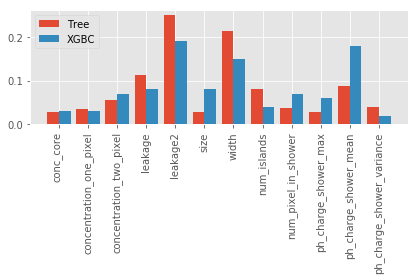

In [160]:
plt.bar(np.arange(12), Tree.feature_importances_, width=0.4, label='Tree')
plt.bar(np.arange(12)+0.4, xgbc.feature_importances_, width=0.4, label='XGBC')
plt.xticks(np.arange(12)+0.2, train_data.drop('label', axis=1).keys(), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

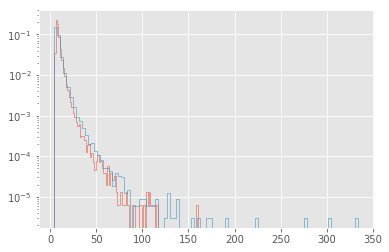

In [179]:
plt.hist(train_data.query('label == 1').ph_charge_shower_mean, normed=True,bins=100, histtype='step')
plt.hist(train_data.query('label == 0').ph_charge_shower_mean, normed=True,bins=100, histtype='step')
plt.yscale('log')
plt.show()